In [3]:
from simulator import Sim
from strategy import ReserverveStrategy
from get_info import get_pnl
from load_data import load_md_from_file


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

PATH_TO_FILE = '../md/btcusdt:Binance:LinearPerpetual/'
NROWS = 100_000

In [4]:
md = load_md_from_file(path=PATH_TO_FILE, nrows=NROWS)

In [5]:
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta

sim = Sim(md, latency, md_latency)

/var/folders/16/mdpczv0n7gd__lsxhtbjlfg80000gn/T/ipykernel_64225/3629183269.py:1: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  latency = pd.Timedelta(10, 'ms').delta
/var/folders/16/mdpczv0n7gd__lsxhtbjlfg80000gn/T/ipykernel_64225/3629183269.py:2: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  md_latency = pd.Timedelta(10, 'ms').delta


In [6]:
delay = pd.Timedelta(0.1, 's').delta

hold_time = pd.Timedelta(10, 's').delta

strategy = ReserverveStrategy(delay, hold_time, param_1= 1.69, param_2= -1.2)

/var/folders/16/mdpczv0n7gd__lsxhtbjlfg80000gn/T/ipykernel_64225/3578686114.py:1: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  delay = pd.Timedelta(0.1, 's').delta
/var/folders/16/mdpczv0n7gd__lsxhtbjlfg80000gn/T/ipykernel_64225/3578686114.py:3: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  hold_time = pd.Timedelta(10, 's').delta


In [7]:
%time trades_list, md_list, updates_list, all_orders = strategy.run(sim)

CPU times: user 19.2 s, sys: 473 ms, total: 19.7 s
Wall time: 33.1 s


In [8]:
%time df = get_pnl(updates_list)

CPU times: user 58.7 s, sys: 897 ms, total: 59.6 s
Wall time: 1min 9s


In [9]:
df

,receive_ts,exchange_ts,total,BTC,USD,mid_price
0,1655942402250125991,1655942402249000000,0.000000,0.000,0.000000,19977.45
1,1655942402624789714,1655942402623000000,0.000000,0.000,0.000000,19977.45
2,1655942402657844605,1655942402655000000,0.000000,0.000,0.000000,19977.45
3,1655942403346968722,1655942403346000000,0.000000,0.000,0.000000,19977.45
4,1655942404080791047,1655942404080000000,0.000000,0.000,0.000000,19977.45
...,...,...,...,...,...,...
217901,1655946004489994329,1655946004489000000,-117.220576,0.053,-1198.746526,20406.15
217902,1655946004522075773,1655946004521000000,-117.180826,0.053,-1198.746526,20406.90
217903,1655946004531000000,1655946004521000000,-117.181420,0.052,-1178.340220,20406.90
217904,1655946004554656538,1655946004553000000,-117.178820,0.052,-1178.340220,20406.95


In [10]:
dt = pd.to_datetime(df.receive_ts)

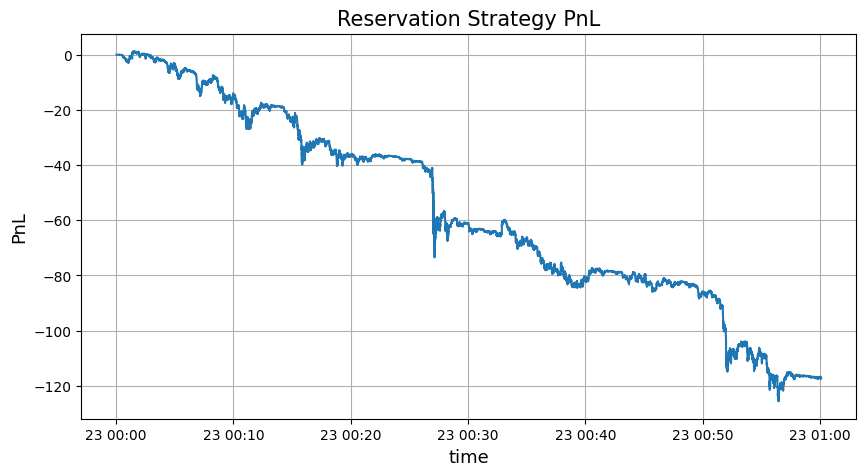

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("Reservation Strategy PnL", fontsize=15)
plt.grid()
plt.show()

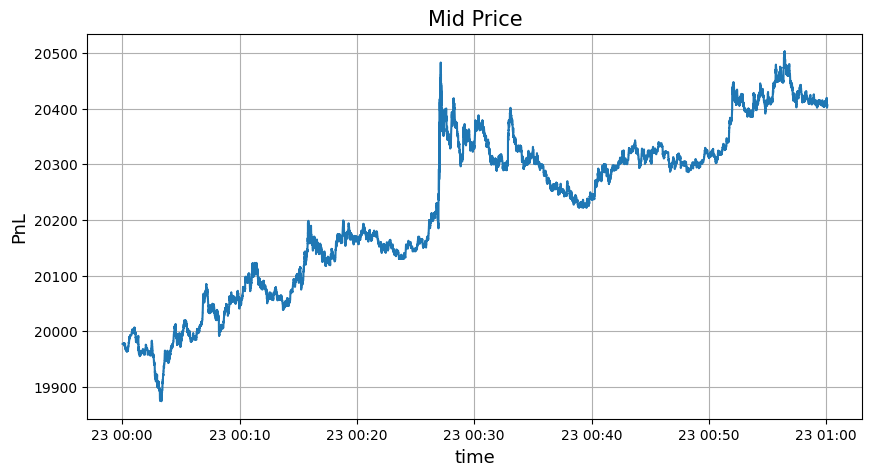

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(dt, df['mid_price'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("Mid Price", fontsize=15)
plt.grid()
plt.show()